In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data_genre = pd.read_csv("./SpotifyFeatures.csv")
data_genre.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [35]:
print("la taille de notre jeu de donnée est :",data_genre.shape)
pd.isnull(data_genre).sum()

la taille de notre jeu de donnée est : (232725, 18)


genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [36]:
data_genre.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,232725.0,41.127502,18.189948,0.00000,29.0000,43.000000,55.0000,100.000
acousticness,232725.0,0.368560,0.354768,0.00000,0.0376,0.232000,0.7220,0.996
danceability,232725.0,0.554364,0.185608,0.05690,0.4350,0.571000,0.6920,0.989
duration_ms,232725.0,235122.339306,118935.909299,15387.00000,182857.0000,220427.000000,265768.0000,5552917.000
energy,232725.0,0.570958,0.263456,0.00002,0.3850,0.605000,0.7870,0.999
instrumentalness,232725.0,0.148301,0.302768,0.00000,0.0000,0.000044,0.0358,0.999
liveness,232725.0,0.215009,0.198273,0.00967,0.0974,0.128000,0.2640,1.000
loudness,232725.0,-9.569885,5.998204,-52.45700,-11.7710,-7.762000,-5.5010,3.744
speechiness,232725.0,0.120765,0.185518,0.02220,0.0367,0.050100,0.1050,0.967
tempo,232725.0,117.666585,30.898907,30.37900,92.9590,115.778000,139.0540,242.903


[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'acousticness'),
 Text(2.5, 0, 'danceability'),
 Text(3.5, 0, 'energy'),
 Text(4.5, 0, 'instrumentalness'),
 Text(5.5, 0, 'liveness'),
 Text(6.5, 0, 'loudness'),
 Text(7.5, 0, 'speechiness'),
 Text(8.5, 0, 'tempo'),
 Text(9.5, 0, 'valence'),
 Text(10.5, 0, 'duration')]

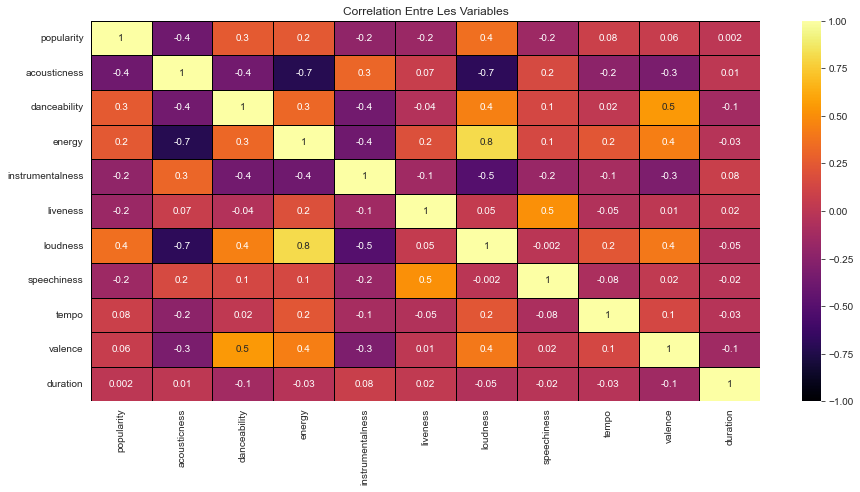

In [37]:
data_genre["duration"] = data_genre["duration_ms"].apply(lambda x : round(x/1000))
data_genre.drop("duration_ms", inplace=True, axis=1)
correlation = data_genre.drop(["key","mode","time_signature"],axis=1).corr(method="pearson")
plt.figure(figsize=(15,7))
map_correlation = sns.heatmap(correlation,annot=True,fmt=".1g",vmin=-1,vmax=1,cmap="inferno",linewidths=1,linecolor="Black")
map_correlation.set_title("Correlation Entre Les Variables")
map_correlation.set_xticklabels(map_correlation.get_xticklabels(),rotation=90)

Text(0, 0.5, 'Genre')

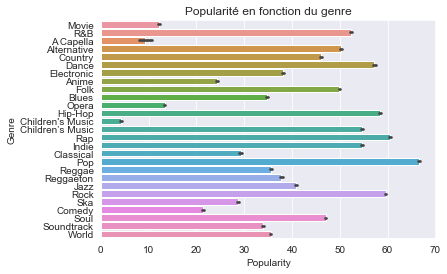

In [46]:
plt.title("Popularité en fonction du genre")
sns.color_palette("crest", as_cmap=False, desat = 0)
sns.barplot(data=data_genre,y='genre',x="popularity")
plt.xlabel("Popularity")
plt.ylabel("Genre")

In [32]:
def plot_scatter(feature1,feature2):
    sns.set_style(style = "darkgrid")
    fig, ax = plt.subplots(figsize=(15,7))
    sns.regplot(data=data_genre,y=feature1,x=feature2,color='c').set(title = feature1 + "en fonction de " + feature2)

    
def plot_line(feature1,feature2):
    sns.set_style(style = "darkgrid")
    fig, ax = plt.subplots(figsize=(15,7))
    sns.lineplot(data=data_genre,y=feature1,x=feature2,color='c').set(title = feature1 + " en fonction de " + feature2)
    

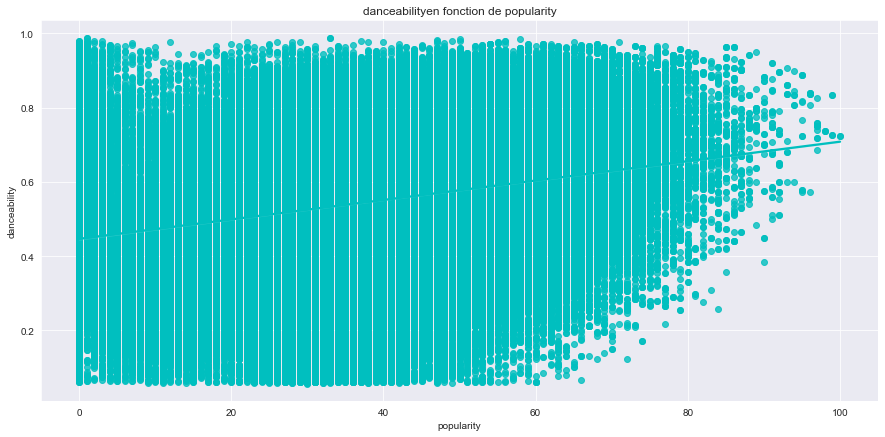

In [8]:
plot_scatter("danceability","popularity")

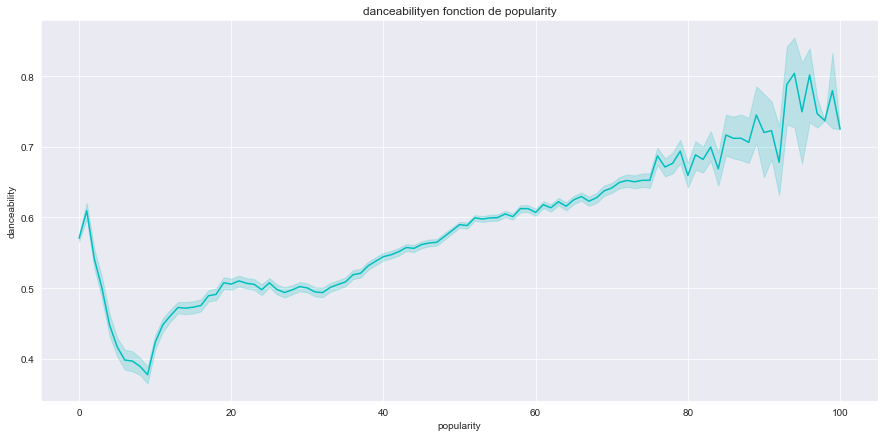

In [10]:
plot_line("danceability","popularity")

In [22]:
L_timesig = data_genre['time_signature'].unique().tolist()
L_mode = data_genre['mode'].unique().tolist()
L_key = data_genre['key'].unique().tolist()

dict_mode = {'Major' : 1, 'Minor' : 0}
dict_key = {'C' : 1, 'C#' : 2, 'D' : 3, 'D#' : 4, 'E' : 5, 'F' : 6, 
        'F#' : 7, 'G' : 9, 'G#' : 10, 'A' : 11, 'A#' : 12, 'B' : 12}

data_genre['time_signature'] = data_genre['time_signature'].apply(lambda x : int(x[0]))
data_genre['mode'].replace(dict_mode, inplace=True)
data_genre['key'] = data_genre['key'].replace(dict_key).astype(int)
data_genre = data_genre.drop(columns='track_id').reset_index(drop=True)
data_genre = data_genre.drop(columns='genre').reset_index(drop=True)
data_genre = data_genre.drop(columns='artist_name').reset_index(drop=True)
data_genre = data_genre.drop(columns='track_name').reset_index(drop=True)
data_genre = data_genre.drop(columns='duration').reset_index(drop=True)
data_genre.head()

,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0,0.611,0.389,0.910,0.000,2,0.3460,-1.828,1,0.0525,166.969,4,0.814
1,1,0.246,0.590,0.737,0.000,7,0.1510,-5.559,0,0.0868,174.003,4,0.816
2,3,0.952,0.663,0.131,0.000,1,0.1030,-13.879,0,0.0362,99.488,5,0.368
3,0,0.703,0.240,0.326,0.000,2,0.0985,-12.178,1,0.0395,171.758,4,0.227
4,4,0.950,0.331,0.225,0.123,6,0.2020,-21.150,1,0.0456,140.576,4,0.390


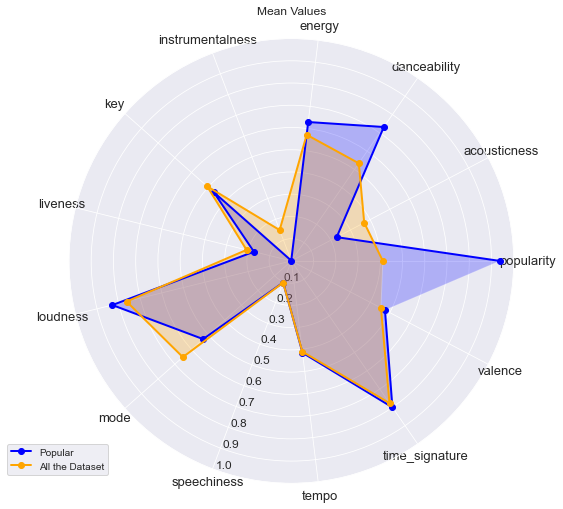

In [23]:
normalized_df=(data_genre - data_genre.min()) / (data_genre.max() - data_genre.min())
normalized_df_top_100 = normalized_df.sort_values('popularity', ascending = False).head(100)

labels = list(normalized_df)[:]

features = normalized_df_top_100.mean().tolist()
features_all = normalized_df.mean().tolist()

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
fig = plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, features, 'o-', linewidth=2, label = "Popular", color= 'blue')
ax.fill(angles, features, alpha=0.25, facecolor='blue')
ax.set_thetagrids(angles * 180/np.pi, labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.1 , 0.2 , 0.3 , 0.4, 0.5,  0.6, 0.7, 0.8, 0.9, 1.0], ["0.1",'0.2', "0.3", "0.4", "0.5", "0.6", '0.7','0.8','0.9','1.0'  ], size=12)
plt.ylim(0,1.0)

ax.plot(angles, features_all, 'o-', linewidth=2, label = "All the Dataset", color= 'orange')
ax.fill(angles, features_all, alpha=0.25, facecolor='orange')
ax.set_title('Mean Values')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))